In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\Lenovo\Desktop\ExerciseFiles\data\olympics.csv', skiprows=4)

In [3]:
df.head()

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
0,Athens,1896,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100m freestyle,M,Gold
1,Athens,1896,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100m freestyle,M,Silver
2,Athens,1896,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100m freestyle for sailors,M,Bronze
3,Athens,1896,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100m freestyle for sailors,M,Gold
4,Athens,1896,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100m freestyle for sailors,M,Silver


In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29216 entries, 0 to 29215
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   City          29216 non-null  object
 1   Edition       29216 non-null  int64 
 2   Sport         29216 non-null  object
 3   Discipline    29216 non-null  object
 4   Athlete       29216 non-null  object
 5   NOC           29216 non-null  object
 6   Gender        29216 non-null  object
 7   Event         29216 non-null  object
 8   Event_gender  29216 non-null  object
 9   Medal         29216 non-null  object
dtypes: int64(1), object(9)
memory usage: 2.2+ MB


In [6]:
df.shape

(29216, 10)

The number of medals per classes

In [7]:
df.Medal.value_counts()

Gold      9850
Bronze    9689
Silver    9677
Name: Medal, dtype: int64

Top 5 cities where most medals were awarded

In [8]:
df.City.value_counts().head()

Athens         2149
Los Angeles    2074
Beijing        2042
Sydney         2015
Atlanta        1859
Name: City, dtype: int64

In [9]:
df.Gender.unique()

array(['Men', 'Women'], dtype=object)

In [10]:
df.Gender.value_counts()

Men      21721
Women     7495
Name: Gender, dtype: int64

In [11]:
df.Athlete.sort_values()

651                 AABYE, Edgar
2849       AALTONEN, Arvo Ossian
2852       AALTONEN, Arvo Ossian
7716    AALTONEN, Paavo Johannes
7730    AALTONEN, Paavo Johannes
                  ...           
603                   ÖSTMO, Ole
608                   ÖSTMO, Ole
621                   ÖSTMO, Ole
596                   ÖSTMO, Ole
8051           ÖSTRAND, Per-Olof
Name: Athlete, Length: 29216, dtype: object

In [12]:
df.sort_values(['Edition', 'Athlete'])

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
7,Athens,1896,Aquatics,Swimming,"ANDREOU, Joannis",GRE,Men,1200m freestyle,M,Silver
82,Athens,1896,Gymnastics,Artistic G.,"ANDRIAKOPOULOS, Nicolaos",GRE,Men,rope climbing,M,Gold
110,Athens,1896,Gymnastics,Artistic G.,"ANDRIAKOPOULOS, Nicolaos",GRE,Men,"team, parallel bars",M,Silver
111,Athens,1896,Gymnastics,Artistic G.,"ATHANASOPOULOS, Spyros",GRE,Men,"team, parallel bars",M,Silver
48,Athens,1896,Cycling,Cycling Road,"BATTEL, Edward",GBR,Men,individual road race,M,Bronze
...,...,...,...,...,...,...,...,...,...,...
28095,Beijing,2008,Equestrian,Dressage,"ZU-SAYN WITTGENSTEIN, Nathalie",DEN,Women,team,X,Bronze
28819,Beijing,2008,Sailing,Sailing,"ZUBARI, Shahar",ISR,Men,RS:X - Windsurfer,M,Bronze
28977,Beijing,2008,Taekwondo,Taekwondo,"ZUBCIC, Martina",CRO,Women,49 - 57 kg,W,Bronze
28387,Beijing,2008,Gymnastics,Rhythmic G.,"ZUEVA, Natalia",RUS,Women,group competition,W,Gold


List the Turkish women who won a medal

In [15]:
df[(df.NOC == 'TUR') & (df.Gender == 'Women')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
20780,Barcelona,1992,Judo,Judo,"SENYURT, Hulya",TUR,Women,- 48kg (extra-lightweight),W,Bronze
24963,Sydney,2000,Taekwondo,Taekwondo,"BIKCIN, Hamide",TUR,Women,49 - 57 kg,W,Bronze
27088,Athens,2004,Weightlifting,Weightlifting,"TAYLAN, Nurcan",TUR,Women,48kg,W,Gold
27550,Beijing,2008,Athletics,Athletics,"ABEYLEGESSE, Elvan",TUR,Women,10000m,W,Silver
27652,Beijing,2008,Athletics,Athletics,"ABEYLEGESSE, Elvan",TUR,Women,5000m,W,Silver
28979,Beijing,2008,Taekwondo,Taekwondo,"TANRIKULU, Azize",TUR,Women,49 - 57 kg,W,Silver
29114,Beijing,2008,Weightlifting,Weightlifting,"OZKAN, Sibel",TUR,Women,48kg,W,Silver


Find the top 10 countries where the women awarded most

In [16]:
df[(df.Gender == 'Women')].groupby(['NOC']).agg({'Medal': pd.Series.count}).sort_values(by='Medal', ascending=False).head(10)

,Medal
NOC,
USA,1215
URS,573
CHN,461
AUS,428
GDR,369
GER,362
ROU,325
NED,314
RUS,293


In [17]:
df.groupby(['Gender', 'Medal']).aggregate({'Medal': pd.Series.count})

Medal
Gender Medal        
Men    Bronze   7175
       Gold     7365
       Silver   7181
Women  Bronze   2514
       Gold     2485
       Silver   2496

In [18]:
df.groupby(['NOC', 'Medal']).aggregate({'Event': pd.Series.count}).sort_values(['Event'], ascending=False)

Event
NOC Medal        
USA Gold     2088
    Silver   1195
    Bronze   1052
URS Gold      838
    Silver    627
...           ...
DJI Bronze      1
DOM Bronze      1
    Silver      1
PUR Silver      1
AFG Bronze      1

[334 rows x 1 columns]

Find all athletes whose name or last name containts the letter 'ö'

In [19]:
df[df.Athlete.str.contains('ö', 'Ö')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
607,Paris,1900,Shooting,Shooting,"MADSEN, Lars Jörgen",DEN,Men,"army rifle, 300m, standing",M,Gold
1224,London,1908,Athletics,Athletics,"BODOR, Ödön",HUN,Men,4x400m relay,M,Bronze
1346,London,1908,Fencing,Fencing,"FUCHS, Jenö",HUN,Men,sabre individual,M,Gold
1352,London,1908,Fencing,Fencing,"FUCHS, Jenö",HUN,Men,sabre team,M,Gold
1391,London,1908,Football,Football,"RASMUSSEN, Björn Vilhelm Ravn",DEN,Men,football,M,Silver
...,...,...,...,...,...,...,...,...,...,...
20955,Barcelona,1992,Rowing,Rowing,"KELLNER, Uwe Jörg",GER,Men,four-oared shell with coxswain (4-),M,Silver
21100,Barcelona,1992,Table Tennis,Table Tennis,"ROSSKOPF, Jörg",GER,Men,doubles,M,Silver
21387,Atlanta,1996,Aquatics,Swimming,"ZIKARSKY, Björn",GER,Men,4x100m freestyle relay,M,Bronze
22963,Atlanta,1996,Table Tennis,Table Tennis,"ROSSKOPF, Jörg",GER,Men,singles,M,Bronze


Get the first andl last name of each athlete 

In [20]:
df.Athlete.str.split(',')

0               [HAJOS,  Alfred]
1            [HERSCHMANN,  Otto]
2           [DRIVAS,  Dimitrios]
3          [MALOKINIS,  Ioannis]
4          [CHASAPIS,  Spiridon]
                  ...           
29211          [ENGLICH,  Mirko]
29212    [MIZGAITIS,  Mindaugas]
29213         [PATRIKEEV,  Yuri]
29214           [LOPEZ,  Mijain]
29215          [BAROEV,  Khasan]
Name: Athlete, Length: 29216, dtype: object

Show that there is no olympics sport whose name starts with 'Gym' except 'Gymnastics'

In [21]:
df[(df.Sport.str.startswith('Gym')) & (df.Sport != 'Gymnastics')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal


Find the events where Jesse Owens won a medal

In [22]:
df[df.Athlete.str.contains('OWENS')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
6427,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,100m,M,Gold
6439,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,200m,M,Gold
6456,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,4x100m relay,M,Gold
6523,Berlin,1936,Athletics,Athletics,"OWENS, Jesse",USA,Men,long jump,M,Gold


Which country has won the most men's singles badminton over the years? Additionaly, sort the players' names for each country.

In [23]:
badminton_df = df[['NOC', 'Athlete', 'Medal']][(df.Event.str.startswith('singles')) & (df.Discipline == 'Badminton') & (df.Gender == 'Men')]
badminton_df.value_counts()

NOC  Athlete                   Medal 
CHN  CHEN, Jin                 Bronze    1
     DONG, Jiong               Silver    1
     JI, Xinpeng               Gold      1
     LIN, Dan                  Gold      1
     XIA, Xuanze               Bronze    1
DEN  HOYER-LARSEN, Poul Erik   Gold      1
     STUER-LAURIDSEN, Thomas   Bronze    1
INA  BUDI KUSUMA, Alan         Gold      1
     HENDRAWAN                 Silver    1
     HIDAYAT, Taufik           Gold      1
     KUNCORO, Soni Dwi         Bronze    1
     SUSANTO, Hermawan         Bronze    1
     WIRANATA, Ardy Bernardus  Silver    1
KOR  SHON, Seung Mo            Silver    1
MAS  LEE, Chong Wei            Silver    1
     SIDEK, Rashid             Bronze    1
dtype: int64

Which three countries has won the most medals from 1984 to 2008

In [24]:
df.NOC[df.Edition >= 1984].value_counts().head(3)

USA    1837
AUS     762
GER     691
Name: NOC, dtype: int64

Show all the events happening within Athletics 

In [25]:
df.Event[df.Discipline == 'Athletics'].unique()

array(['100m', '110m hurdles', '1500m', '400m', '800m', 'discus throw',
       'high jump', 'long jump', 'marathon', 'pole vault', 'shot put',
       'triple jump', '200m', '200m hurdles', '3000m steeplechase',
       '4000m steeplechase', '400m hurdles', '5000m team', '60m',
       'hammer throw', 'high jump, standing', 'long jump, standing',
       'triple jump, standing', '4miles team',
       '56lb weight throw (25.4kg)', 'decathlon',
       'triathlon (long jump / shot put / 100 yards)',
       '10miles walk (16093m)', '3200m steeplechase', '3500m walk',
       '3miles team (4828m)', '4x400m relay', '5 miles (8047m)',
       'discus throw ancient style', 'javelin throw',
       'javelin throw freestyle', '10000m', '10000m walk', '3000m team',
       '4x100m relay', '5000m', 'cross country individual',
       'cross country team', 'discus throw, both hands',
       'javelin throw, both hands', 'pentathlon', 'shot put, both hands',
       '3000m walk', '50km walk', '80m hurdles', '2

Find all the male gold medal winners for the 100m track

In [26]:
df[(df.Discipline == 'Athletics') & (df.Event == '100m') & (df.Medal == 'Gold')].sort_values(by='Edition', ascending=False)[['City', 'Edition', 'Athlete', 'Medal']]

,City,Edition,Athlete,Medal
27554,Beijing,2008,"FRASER, Shelly-ann",Gold
27552,Beijing,2008,"BOLT, Usain",Gold
25542,Athens,2004,"NESTERENKO, Yuliya",Gold
25539,Athens,2004,"GATLIN, Justin",Gold
23521,Sydney,2000,"GREENE, Maurice",Gold
21601,Atlanta,1996,"DEVERS, Gail",Gold
21598,Atlanta,1996,"BAILEY, Donovan",Gold
19862,Barcelona,1992,"DEVERS, Gail",Gold
19859,Barcelona,1992,"CHRISTIE, Linford",Gold
18284,Seoul,1988,"LEWIS, Carl",Gold


Show the event Usain Bolt attended 

In [27]:
df[df.Athlete.str.contains('BOLT, Usain')]

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27552,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,100m,M,Gold
27570,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,200m,M,Gold
27603,Beijing,2008,Athletics,Athletics,"BOLT, Usain",JAM,Men,4x100m relay,M,Gold


# Basic Plotting

What were the different sports in the first olympics?

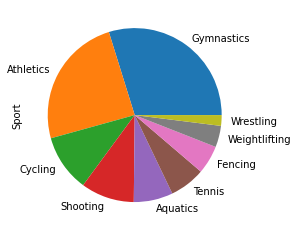

In [45]:
df[df.Edition == 1896].Sport.value_counts().plot(kind='pie');

Plot the same pie as a bar graph

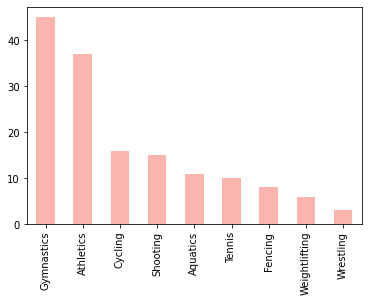

In [28]:
df[df.Edition == 1896].Sport.value_counts().plot(kind='bar', colormap='Pastel1');

Display the histogram of how much games played each year

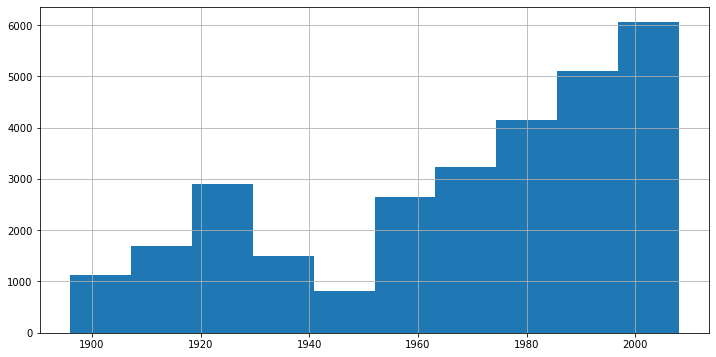

In [29]:
df.Edition.hist(figsize=(12,6));

How much medals went to each gender over the years

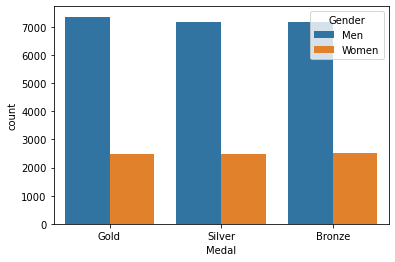

In [30]:
sns.countplot(data=df, x='Medal', hue='Gender');

In [47]:
chn_df

,City,Edition,Sport,Discipline,Athlete,NOC,Gender,Event,Event_gender,Medal
27176,Beijing,2008,Aquatics,Diving,"ZHOU, Luxin",CHN,Men,10m platform,M,Silver
27177,Beijing,2008,Aquatics,Diving,"WANG, Xin",CHN,Women,10m platform,W,Bronze
27178,Beijing,2008,Aquatics,Diving,"CHEN, Ruolin",CHN,Women,10m platform,W,Gold
27180,Beijing,2008,Aquatics,Diving,"QIN, Kai",CHN,Men,3m springboard,M,Bronze
27181,Beijing,2008,Aquatics,Diving,"HE, Chong",CHN,Men,3m springboard,M,Gold
...,...,...,...,...,...,...,...,...,...,...
29138,Beijing,2008,Weightlifting,Weightlifting,"LI, Hongli",CHN,Men,77kg,M,Silver
29140,Beijing,2008,Weightlifting,Weightlifting,"LU, Yong",CHN,Men,85kg,M,Gold
29156,Beijing,2008,Wrestling,Wrestling Free.,"XU, Li",CHN,Women,48 - 55kg,W,Silver
29171,Beijing,2008,Wrestling,Wrestling Free.,"WANG, Jiao",CHN,Women,63 - 72kg,W,Gold


Show how much medals the USA got over the whole course

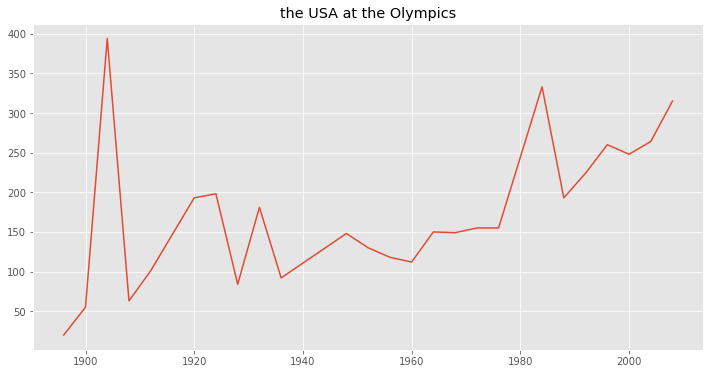

In [114]:
usa = df[df.NOC == 'USA']['Edition'].value_counts().sort_index()
aus = df[df.NOC == 'AUS']['Edition'].value_counts().sort_index()

plt.style.use('ggplot')
fig = plt.figure(figsize=(12,6))

plt.plot(usa.index, usa.values)
plt.title('the USA at the Olympics');

The olmypics medals distribution over each sport for Chinese team in 2008

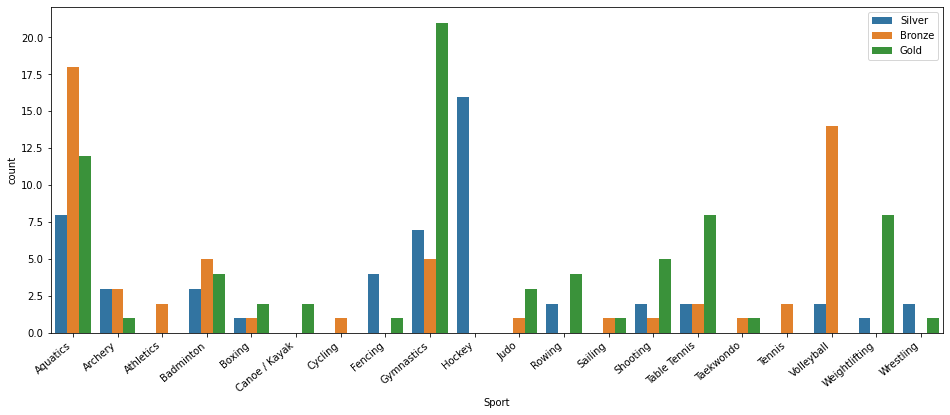

In [31]:
chn_df = df[(df.NOC == 'CHN') & (df.Edition == 2008)]
plt.figure(figsize=(16,6))
ax = sns.countplot(data=chn_df, x='Sport', hue='Medal')
plt.legend(loc='upper right')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");

Compare the number of medals won by Chine male and female athletes

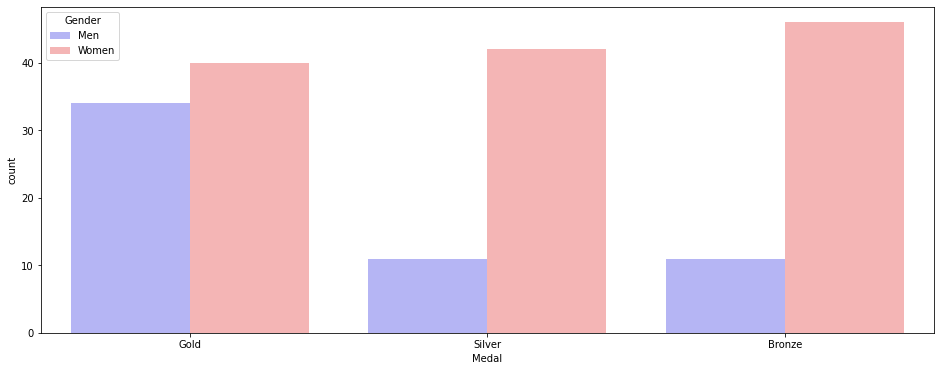

In [32]:
plt.figure(figsize=(16,6))
sns.countplot(data=chn_df, x='Medal', hue='Gender', palette='bwr', order=['Gold', 'Silver', 'Bronze']);

Now, index the dataframe by athletes

In [33]:
df.set_index('Athlete', inplace=True)
df.sort_index(inplace=True)
df.tail()

,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
Athlete,,,,,,,,,
"ÖSTMO, Ole",Paris,1900,Shooting,Shooting,NOR,Men,"army rifle, 300m, prone",M,Bronze
"ÖSTMO, Ole",Paris,1900,Shooting,Shooting,NOR,Men,"army rifle, 300m, standing",M,Silver
"ÖSTMO, Ole",Paris,1900,Shooting,Shooting,NOR,Men,"free rifle, team",M,Silver
"ÖSTMO, Ole",Paris,1900,Shooting,Shooting,NOR,Men,"army rifle, 300m, 3 positions",M,Bronze
"ÖSTRAND, Per-Olof",Helsinki,1952,Aquatics,Swimming,SWE,Men,400m freestyle,M,Bronze


Turn back to the previous index now

In [34]:
df.reset_index(inplace=True)
df.tail()

,Athlete,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
29211,"ÖSTMO, Ole",Paris,1900,Shooting,Shooting,NOR,Men,"army rifle, 300m, prone",M,Bronze
29212,"ÖSTMO, Ole",Paris,1900,Shooting,Shooting,NOR,Men,"army rifle, 300m, standing",M,Silver
29213,"ÖSTMO, Ole",Paris,1900,Shooting,Shooting,NOR,Men,"free rifle, team",M,Silver
29214,"ÖSTMO, Ole",Paris,1900,Shooting,Shooting,NOR,Men,"army rifle, 300m, 3 positions",M,Bronze
29215,"ÖSTRAND, Per-Olof",Helsinki,1952,Aquatics,Swimming,SWE,Men,400m freestyle,M,Bronze


In [35]:
df.shape

(29216, 10)

In [36]:
df.head()

,Athlete,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
0,"AABYE, Edgar",Paris,1900,Tug of War,Tug of War,ZZX,Men,tug of war,M,Gold
1,"AALTONEN, Arvo Ossian",Antwerp,1920,Aquatics,Swimming,FIN,Men,200m breaststroke,M,Bronze
2,"AALTONEN, Arvo Ossian",Antwerp,1920,Aquatics,Swimming,FIN,Men,400m breaststroke,M,Bronze
3,"AALTONEN, Paavo Johannes",London,1948,Gymnastics,Artistic G.,FIN,Men,pommel horse,M,Gold
4,"AALTONEN, Paavo Johannes",London,1948,Gymnastics,Artistic G.,FIN,Men,team competition,M,Gold


In [37]:
df.loc[0, 'Sport']

'Tug of War'

In [127]:
df

,Athlete,City,Edition,Sport,Discipline,NOC,Gender,Event,Event_gender,Medal
0,"AABYE, Edgar",Paris,1900,Tug of War,Tug of War,ZZX,Men,tug of war,M,Gold
1,"AALTONEN, Arvo Ossian",Antwerp,1920,Aquatics,Swimming,FIN,Men,200m breaststroke,M,Bronze
2,"AALTONEN, Arvo Ossian",Antwerp,1920,Aquatics,Swimming,FIN,Men,400m breaststroke,M,Bronze
3,"AALTONEN, Paavo Johannes",London,1948,Gymnastics,Artistic G.,FIN,Men,pommel horse,M,Gold
4,"AALTONEN, Paavo Johannes",London,1948,Gymnastics,Artistic G.,FIN,Men,team competition,M,Gold
...,...,...,...,...,...,...,...,...,...,...
29211,"ÖSTMO, Ole",Paris,1900,Shooting,Shooting,NOR,Men,"army rifle, 300m, prone",M,Bronze
29212,"ÖSTMO, Ole",Paris,1900,Shooting,Shooting,NOR,Men,"army rifle, 300m, standing",M,Silver
29213,"ÖSTMO, Ole",Paris,1900,Shooting,Shooting,NOR,Men,"free rifle, team",M,Silver
29214,"ÖSTMO, Ole",Paris,1900,Shooting,Shooting,NOR,Men,"army rifle, 300m, 3 positions",M,Bronze


Plot the total number of medals awarded each year 

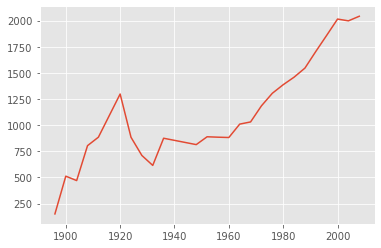

In [139]:
df['Edition'].value_counts().sort_index().plot();

In [144]:
'NOR' in df.NOC[df.Edition == 2008].values

True

Which countries did not win a medal in 2008 Olympics and how many of them were there?

In [155]:
countries = df.NOC.unique()
not_won = []
for country in countries:
    if country not in df.NOC[df.Edition == 2008].values and country not in not_won:
        not_won.append(country)
print(f'{len(not_won)} number of countries did not win a medal in 2008, they were\n')
for loser in not_won:
    print(loser)

52 number of countries did not win a medal in 2008, they were

ZZX
PAK
URS
EUN
GDR
PUR
GHA
URU
TCH
EUA
DJI
UGA
SYR
FRG
KUW
KSA
UAE
LUX
YUG
GUY
QAT
HAI
ANZ
PAR
TAN
LIB
IOP
RU1
AHO
PER
SCG
NIG
SEN
NAM
BWI
BOH
BER
ISV
MKD
SRI
HKG
ZAM
MOZ
SUR
BDI
CRC
PHI
ERI
BAR
CIV
IRQ
TGA


In [158]:
for key, value in df.groupby('Edition'):
    print(key)

1896
1900
1904
1908
1912
1920
1924
1928
1932
1936
1948
1952
1956
1960
1964
1968
1972
1976
1980
1984
1988
1992
1996
2000
2004
2008


In [162]:
df.groupby('Edition').size().head()

Edition
1896    151
1900    512
1904    470
1908    804
1912    885
dtype: int64

Note that the plot of this groupby object is the same as plotting total medals over years

<AxesSubplot:xlabel='Edition'>

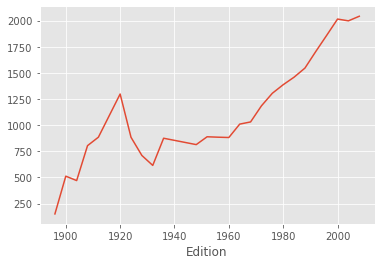

In [163]:
df.groupby('Edition').size().plot()

In [169]:
df.groupby(['Edition','Medal']).max()

Athlete     City       Sport       Discipline  \
Edition Medal                                                                 
1896    Bronze   WEINGÄRTNER, Hermann   Athens   Wrestling  Wrestling Gre-R   
        Gold            ZUTTER, Louis   Athens   Wrestling  Wrestling Gre-R   
        Silver          ZUTTER, Louis   Athens   Wrestling  Wrestling Gre-R   
1900    Bronze             ÖSTMO, Ole    Paris      Tennis       Water polo   
        Gold    ZEALLEY, James Edward    Paris  Tug of War       Water polo   
...                               ...      ...         ...              ...   
2004    Gold             ZWEHL, Julia   Athens   Wrestling  Wrestling Gre-R   
        Silver         ZYKINA, Olesya   Athens   Wrestling  Wrestling Gre-R   
2008    Bronze        ZVONAREVA, Vera  Beijing   Wrestling  Wrestling Gre-R   
        Gold           ZUEVA, Natalia  Beijing   Wrestling  Wrestling Gre-R   
        Silver        ZLATEVA, Stanka  Beijing   Wrestling  Wrestling Gre-R   

                NOC Gender          Event Event_gender  
Edition Medal                                           
1896    Bronze  ZZX    Men          vault            M  
        Gold    ZZX    Men          vault            M  
        Silver  ZZX    Men          vault            M  
1900    Bronze  ZZX  Women  épée, masters            X  
        Gold    ZZX  Women  épée, masters            X  
...             ...    ...            ...          ...  
2004    Gold    ZIM  Women      épée team            X  
        Silver  ZIM  Women      épée team            X  
2008    Bronze  VEN  Women      épée team            X  
        Gold    ZIM  Women      épée team            X  
        Silver  ZIM  Women      épée team            X  

[78 rows x 8 columns]

How much medals Carl Lewis won in total? Display it with the first and last year Lewis attended the Olympics.

In [171]:
df[df.Athlete == 'LEWIS, Carl'].groupby('Athlete').agg({'Edition': ['min', 'max', 'count']})

Edition            
                min   max count
Athlete                        
LEWIS, Carl    1984  1996    10

Now display the total number of medals each country got, with the years the regarding country attended the Olympics the first and the last time 

In [194]:
noc_df = df.groupby('NOC').agg({'Edition': ['min', 'max', 'count']})
noc_df.sort_values(by=noc_df.columns[2], ascending=False)

Edition            
        min   max count
NOC                    
USA    1896  2008  4335
URS    1952  1988  2049
GBR    1896  2008  1594
FRA    1896  2008  1314
ITA    1900  2008  1228
..      ...   ...   ...
MRI    2008  2008     1
NIG    1972  1972     1
TGA    1996  1996     1
SEN    1988  1988     1
AFG    2008  2008     1

[138 rows x 3 columns]

In [188]:
df.groupby('NOC').agg({'Edition': ['count', 'min', 'max']}).columns[0][1]

'count'

Display the number of medals the men and the women won in 100m and 200m athletics per country

In [221]:
ath = df[(df.Edition == 2008) & ((df.Event == '100m') | (df.Event == '200m'))].groupby(['NOC', 'Gender', 'Discipline', 'Event']).size()
ath

NOC  Gender  Discipline  Event
JAM  Men     Athletics   100m     1
                         200m     1
     Women   Athletics   100m     3
                         200m     2
TRI  Men     Athletics   100m     1
USA  Men     Athletics   100m     1
                         200m     2
     Women   Athletics   200m     1
dtype: int64

Now show this dataframe in a more succint format with unstack

In [224]:
ath = ath.unstack(['Discipline', 'Event'])
ath

Discipline Athletics     
Event           100m 200m
NOC Gender               
JAM Men          1.0  1.0
    Women        3.0  2.0
TRI Men          1.0  NaN
USA Men          1.0  2.0
    Women        NaN  1.0

In [225]:
ath.stack('Event')

Discipline        Athletics
NOC Gender Event           
JAM Men    100m         1.0
           200m         1.0
    Women  100m         3.0
           200m         2.0
TRI Men    100m         1.0
USA Men    100m         1.0
           200m         2.0
    Women  200m         1.0

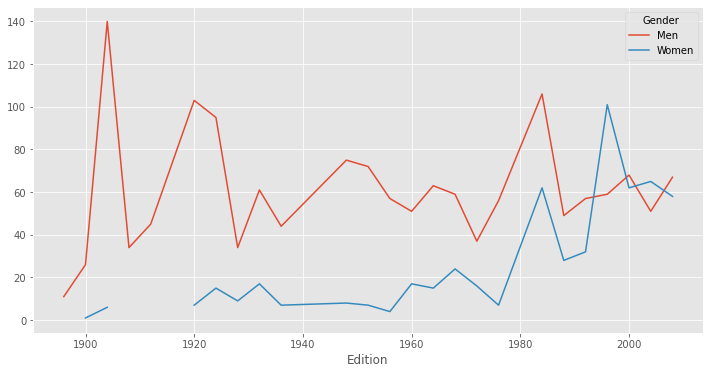

In [271]:
usa_ath = df[(df.NOC == 'USA') & (df.Medal == 'Gold')].groupby(['Edition', 'Gender']).size()
usa_ath.unstack(['Gender']).plot(figsize=(12,6));

So cool! uWu

Find the top 10 athletes who won the most gold medals in the history. If there is a tie, consider the number of silver and bronze medals, respectively.

In [270]:
most_gold = df[(df.Sport == 'Athletics') & ((df.Medal == 'Gold') | (df.Medal == 'Silver') |(df.Medal == 'Bronze'))].groupby(['Athlete', 'Medal']).agg({'Medal': 'count'})
most_gold

Medal
Athlete                    Medal        
ABAKUMOVA, Maria           Silver      1
ABASCAL GOMEZ, Jose Manuel Bronze      1
ABDUVALIEV, Andrey         Gold        1
ABEBE, Addis               Bronze      1
ABERA, Gezahegne           Gold        1
...                                  ...
ZYBINA, Galina             Bronze      1
                           Gold        1
                           Silver      1
ZYKINA, Olesya             Bronze      1
                           Silver      1

[2988 rows x 1 columns]

In [262]:
most_gold.unstack('Medal').columns

MultiIndex([('Medal', 'Bronze'),
            ('Medal',   'Gold'),
            ('Medal', 'Silver')],
           names=[None, 'Medal'])

In [267]:
most_gold.unstack('Medal').sort_values([('Medal',   'Gold'), ('Medal',   'Silver')], ascending=False).head(10)

Medal            
Medal                Bronze Gold Silver
Athlete                                
NURMI, Paavo            NaN  9.0    3.0
LEWIS, Carl             NaN  9.0    1.0
EWRY, Ray               NaN  8.0    NaN
RITOLA, Ville           NaN  5.0    3.0
ASHFORD, Evelyn         NaN  4.0    1.0
KOLEHMAINEN, Hannes     NaN  4.0    1.0
SHEPPARD, Melvin        NaN  4.0    1.0
ZATOPEK, Emil           NaN  4.0    1.0
BLANKERS-KOEN, Fanny    NaN  4.0    NaN
CUTHBERT, Betty         NaN  4.0    NaN